In [3]:
graphics_toolkit("gnuplot"); % use if "plot" does not work

## Řešení 1d úlohy s konvektivním členem pomocí Galerkinovy metody s polynomiální bází

Úkolem je vyřešit následující okrajovou úlohu pomocí Galerkinovy metody s polynomiální bází. Tuto úlohu umíme řešit i analyticky a již jsme ji řešili také metodou konečných diferencí. Toto řešení tedy můžete porovnat s dříve získanými. 

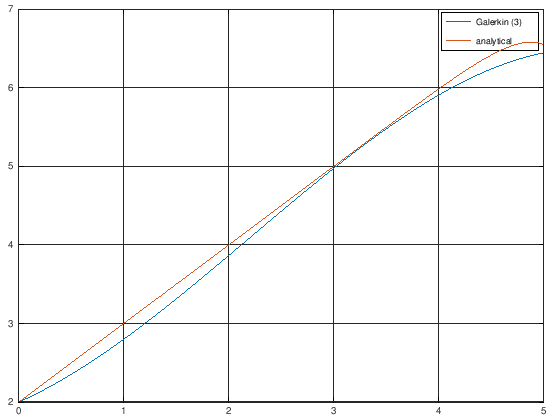

In [4]:
%% boundary value problem
%   -k*u''(x)+D*u'(x)=f
%   u(0)=U
%   -k*u'(l)=T

f=10;
k=3;
L=5;
D=10;
U=2;
T=1.5;

%% analytical solution
C2=(-T/k-f/D)/(D/k*exp(D*L/k));
C1=U-C2;
u_analytical=@(x)C1+C2*exp(D/k*x)+f/D*x;

%% Galerkin solution
n=3;    % maximal polynomial degree
A=zeros(n);
A1=zeros(n);
b=zeros(n,1);
for i=1:n
    for j=1:n
        A(i,j)=k*i*j/(i+j-1)*L^(i+j-1);
        A1(i,j)=D*j/(i+j)*L^(i+j);
    end
    b(i)=f/(i+1)*L^(i+1)-T*L^i;
end
alfa=(A+A1)\b;

u_G=@(x)U;
for i=1:n
    u_G = @(x) u_G(x) + alfa(i)*x.^i;
end
x_G=linspace(0,L,100);    % points of visualization

figure;
plot(x_G,u_G(x_G)) % plot of the Galerkin solution
hold on
plot(x_G,u_analytical(x_G)) % plot of the analytical solution
legend('Galerkin (3)','analytical');
grid on